In [ ]:
### Exercise 3.27
### (Notice that this contains both part 1 and 2, where part 2 is answered by the "Percent of Frobenius norm captured")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def SVD_img_reconstruction(A,k):
    B = np.zeros_like(A)
    
    #We decompose A for each red, green, blue and alpha channel
    U_r, sig_r, V_r = np.linalg.svd(A[:,:,0])
    U_g, sig_g, V_g = np.linalg.svd(A[:,:,1])
    U_b, sig_b, V_b = np.linalg.svd(A[:,:,2])
    U_a, sig_a, V_a = np.linalg.svd(A[:,:,3])
    
    B[:,:,0] = np.matrix(U_r[:,:k]) * np.diag(sig_r[:k]) * np.matrix(V_r[:k,:])
    B[:,:,1] = np.matrix(U_g[:,:k]) * np.diag(sig_g[:k]) * np.matrix(V_g[:k,:])
    B[:,:,2] = np.matrix(U_b[:,:k]) * np.diag(sig_b[:k]) * np.matrix(V_b[:k,:])
    B[:,:,3] = np.matrix(U_a[:,:k]) * np.diag(sig_a[:k]) * np.matrix(V_a[:k,:])
    
    #We make sure we're not over 255 for rgba
    B = np.clip(B,0,255)
    
    print("Percent of the Frobenius norm captured: " + str(np.sum(sig_r[:k])/np.sum(sig_r)))
    
    return B

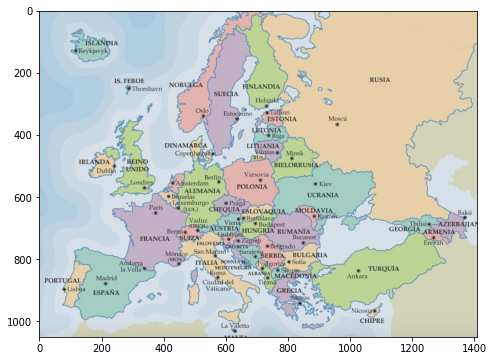

In [2]:
img = Image.open('Europe.png')
img.load()
#Convert to numpy array
A = np.asarray(img, dtype = "int32")
plt.figure(figsize =(9,6))
plt.imshow(A)

Percent of the Frobenius norm captured: 0.3049436222340228


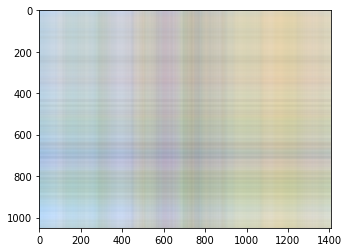

In [6]:
### 1 singular value
plt.imshow(SVD_img_reconstruction(A,1));

Percent of the Frobenius norm captured: 0.32083110836096984


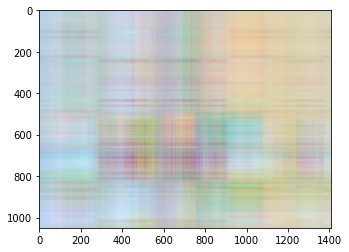

In [3]:
### 2 singular values
plt.imshow(SVD_img_reconstruction(A,2));

Percent of the Frobenius norm captured: 0.3451829032115081


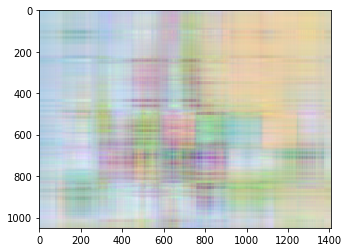

In [8]:
### 4 singular values
plt.imshow(SVD_img_reconstruction(A,4));

Percent of the Frobenius norm captured: 0.5292968974433235


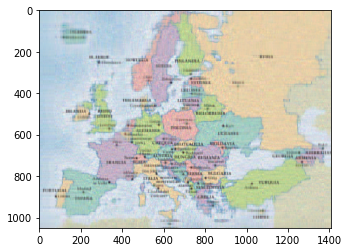

In [5]:
### 16 singular values
plt.imshow(SVD_img_reconstruction(A,40));